# Required Libraries for Project

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import  matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Desktop/H2HBABBA2807.csv")

In [3]:
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200769623,WAL-MAR systems,05-11-2019 00:00,2019,1930053631,26-10-2019,20191025,20191026,20191110,USD,RV,1,NaN,1328.25,20191026,NAH4,1.930054e+09,0
1,U001,200756072,REINHA co,01-11-2019 00:00,2019,1929983369,18-10-2019,20191008,20191018,20191102,USD,RV,1,NaN,19389.51,20191018,NAA8,1.929983e+09,0
2,U001,200744019,TARG corp,NaN,2020,1930687944,25-03-2020,20200323,20200325,20200409,USD,RV,1,NaN,11537.62,20200325,NAA8,1.930688e+09,1
3,U001,200782669,SYGMA llc,18-04-2019 00:00,2019,1929050205,02-04-2019,20190330,20190402,20190417,USD,RV,1,NaN,3782.02,20190402,NAA8,1.929050e+09,0
4,CA02,140104409,LOB co,18-10-2019 00:00,2019,2960584485,08-10-2019,20191008,20191008,20191020,CAD,RV,1,NaN,55768.71,20191010,CA10,2.960584e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,200759878,SA corporation,18-02-2020 00:00,2020,1930455157,31-01-2020,20200129,20200131,20200215,USD,RV,1,NaN,99898.26,20200131,NAH4,1.930455e+09,0
49996,U001,200726979,BJ'S trust,17-01-2020 00:00,2020,1930339484,02-01-2020,20191231,20200102,20200117,USD,RV,1,NaN,234.09,20200102,NAA8,1.930339e+09,0
49997,U001,200782669,SYGMA us,18-10-2019 00:00,2019,1929952142,04-10-2019,20191002,20191004,20191019,USD,RV,1,NaN,28760.55,20191004,NAA8,1.929952e+09,0
49998,U001,200124634,BAKEMAR foundation,01-10-2019 00:00,2019,1929870823,18-09-2019,20190912,20190918,20190928,USD,RV,1,NaN,1221.12,20190918,NA10,1.929871e+09,0


# Data Preprocessing , Data Manipulation - M1

In [4]:
#Taking non null clear_date data for train_set and null value for test_set
main_train = df[df.clear_date.isnull()==False]
main_test = df[df.clear_date.isnull()]

In [5]:
#Checking rows & columns in dataframe 
main_train.shape

(40000, 19)

In [6]:
#checing whether any - all null value column there in main_train_set_data
main_train.isna().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                    0
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             40000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    3
isOpen                        0
dtype: int64

In [7]:
#Removing null columns
main_train = main_train.drop('area_business',axis=1)

In [8]:
#Droping  duplicates row 
main_train.drop_duplicates(keep=False,inplace=True)

In [9]:
#Converting posting_date datatype to datetime
main_train['posting_date'] = pd.to_datetime(main_train['posting_date'])
main_train.dtypes

business_code                     object
cust_number                       object
name_customer                     object
clear_date                        object
buisness_year                      int64
doc_id                             int64
posting_date              datetime64[ns]
document_create_date               int64
document_create_date.1             int64
due_in_date                        int64
invoice_currency                  object
document type                     object
posting_id                         int64
total_open_amount                float64
baseline_create_date               int64
cust_payment_terms                object
invoice_id                       float64
isOpen                             int64
dtype: object

In [10]:
#Converting clear_date datatype to datetime
main_train['clear_date'] = pd.to_datetime(main_train['clear_date'])
main_train.dtypes

business_code                     object
cust_number                       object
name_customer                     object
clear_date                datetime64[ns]
buisness_year                      int64
doc_id                             int64
posting_date              datetime64[ns]
document_create_date               int64
document_create_date.1             int64
due_in_date                        int64
invoice_currency                  object
document type                     object
posting_id                         int64
total_open_amount                float64
baseline_create_date               int64
cust_payment_terms                object
invoice_id                       float64
isOpen                             int64
dtype: object

In [11]:
#Converting document_create_date datatype to datetime
main_train['document_create_date'] = main_train['document_create_date'].astype(str)


In [12]:
#Converting document_create_date datatype to datetime
main_train['document_create_date'] = pd.to_datetime(main_train['document_create_date'])
main_train

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200769623,WAL-MAR systems,2019-05-11,2019,1930053631,2019-10-26,2019-10-25,20191026,20191110,USD,RV,1,1328.25,20191026,NAH4,1.930054e+09,0
1,U001,200756072,REINHA co,2019-01-11,2019,1929983369,2019-10-18,2019-10-08,20191018,20191102,USD,RV,1,19389.51,20191018,NAA8,1.929983e+09,0
3,U001,200782669,SYGMA llc,2019-04-18,2019,1929050205,2019-02-04,2019-03-30,20190402,20190417,USD,RV,1,3782.02,20190402,NAA8,1.929050e+09,0
4,CA02,140104409,LOB co,2019-10-18,2019,2960584485,2019-08-10,2019-10-08,20191008,20191020,CAD,RV,1,55768.71,20191010,CA10,2.960584e+09,0
6,U001,200769623,WAL-MAR corp,2019-02-04,2019,1929004804,2019-03-22,2019-03-21,20190322,20190406,USD,RV,1,34415.95,20190322,NAH4,1.929005e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,200759878,SA corporation,2020-02-18,2020,1930455157,2020-01-31,2020-01-29,20200131,20200215,USD,RV,1,99898.26,20200131,NAH4,1.930455e+09,0
49996,U001,200726979,BJ'S trust,2020-01-17,2020,1930339484,2020-02-01,2019-12-31,20200102,20200117,USD,RV,1,234.09,20200102,NAA8,1.930339e+09,0
49997,U001,200782669,SYGMA us,2019-10-18,2019,1929952142,2019-04-10,2019-10-02,20191004,20191019,USD,RV,1,28760.55,20191004,NAA8,1.929952e+09,0
49998,U001,200124634,BAKEMAR foundation,2019-01-10,2019,1929870823,2019-09-18,2019-09-12,20190918,20190928,USD,RV,1,1221.12,20190918,NA10,1.929871e+09,0


In [13]:
#Dropping document_create_date.1 duplicate Column with same value with that of document_create_date.1
main_train.drop('document_create_date.1',axis=1,inplace = True)

In [14]:
#Converting due_in_date datatype to datetime
main_train['due_in_date'] = main_train['due_in_date'].astype(str)
main_train.dtypes

business_code                   object
cust_number                     object
name_customer                   object
clear_date              datetime64[ns]
buisness_year                    int64
doc_id                           int64
posting_date            datetime64[ns]
document_create_date    datetime64[ns]
due_in_date                     object
invoice_currency                object
document type                   object
posting_id                       int64
total_open_amount              float64
baseline_create_date             int64
cust_payment_terms              object
invoice_id                     float64
isOpen                           int64
dtype: object

In [15]:
#Converting due_in_date datatype to datetime
main_train['due_in_date'] = pd.to_datetime(main_train['due_in_date'])
main_train.dtypes

business_code                   object
cust_number                     object
name_customer                   object
clear_date              datetime64[ns]
buisness_year                    int64
doc_id                           int64
posting_date            datetime64[ns]
document_create_date    datetime64[ns]
due_in_date             datetime64[ns]
invoice_currency                object
document type                   object
posting_id                       int64
total_open_amount              float64
baseline_create_date             int64
cust_payment_terms              object
invoice_id                     float64
isOpen                           int64
dtype: object

In [16]:
#Converting baseline_create_date datatype to datetime
main_train['baseline_create_date']=main_train['baseline_create_date'].astype(str)

In [17]:
#Converting baseline_create_date datatype to datetime
main_train['baseline_create_date'] = pd.to_datetime(main_train['baseline_create_date'])


In [18]:
#Checking whether invoice_id  column has null value
print(main_train['invoice_id'].isnull().sum())

3


In [19]:
#Droping null value found in invoice_id
main_train = main_train.dropna(subset=['invoice_id'])

In [20]:
#Converting invoice_id datatype to int
main_train['invoice_id'] = main_train['invoice_id'].astype(int)
main_train['invoice_id'].dtype

dtype('int32')

In [21]:
#Checking frequency of values in posting_id and droping posting id
main_train['posting_id'].value_counts()

1    38265
Name: posting_id, dtype: int64

In [22]:
#Dropping posting_id column as there is no use in project
main_train['posting_id'] = main_train['posting_id'].replace(1,np.nan)
main_train.dropna(how='all', axis=1, inplace=True)

In [23]:
#Dropping isOpen column as there is no use in project
main_train['isOpen'] = main_train['isOpen'].replace(0,np.nan)
main_train.dropna(how='all', axis=1, inplace=True)

In [24]:
#Adding a new delay column in dataframe
main_train['delay'] = main_train['clear_date']-main_train['due_in_date']
#Storing value in days timedelta datatype
main_train['delay'] = main_train['delay'].dt.days

In [25]:
#check
main_train

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,delay
0,U001,200769623,WAL-MAR systems,2019-05-11,2019,1930053631,2019-10-26,2019-10-25,2019-11-10,USD,RV,1328.25,2019-10-26,NAH4,1930053631,-183
1,U001,200756072,REINHA co,2019-01-11,2019,1929983369,2019-10-18,2019-10-08,2019-11-02,USD,RV,19389.51,2019-10-18,NAA8,1929983369,-295
3,U001,200782669,SYGMA llc,2019-04-18,2019,1929050205,2019-02-04,2019-03-30,2019-04-17,USD,RV,3782.02,2019-04-02,NAA8,1929050205,1
4,CA02,140104409,LOB co,2019-10-18,2019,2960584485,2019-08-10,2019-10-08,2019-10-20,CAD,RV,55768.71,2019-10-10,CA10,-2147483648,-2
6,U001,200769623,WAL-MAR corp,2019-02-04,2019,1929004804,2019-03-22,2019-03-21,2019-04-06,USD,RV,34415.95,2019-03-22,NAH4,1929004804,-61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,200759878,SA corporation,2020-02-18,2020,1930455157,2020-01-31,2020-01-29,2020-02-15,USD,RV,99898.26,2020-01-31,NAH4,1930455157,3
49996,U001,200726979,BJ'S trust,2020-01-17,2020,1930339484,2020-02-01,2019-12-31,2020-01-17,USD,RV,234.09,2020-01-02,NAA8,1930339484,0
49997,U001,200782669,SYGMA us,2019-10-18,2019,1929952142,2019-04-10,2019-10-02,2019-10-19,USD,RV,28760.55,2019-10-04,NAA8,1929952142,-1
49998,U001,200124634,BAKEMAR foundation,2019-01-10,2019,1929870823,2019-09-18,2019-09-12,2019-09-28,USD,RV,1221.12,2019-09-18,NA10,1929870823,-261


In [26]:
#Sorting dataframe using posting_date in ascending order of Dates 
main_train = main_train.sort_values(by = 'posting_date')
main_train

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,delay
26701,U001,200744019,TARG corporation,2019-01-18,2019,1928540982,2018-12-30,2018-12-30,2019-01-14,USD,RV,1372.00,2018-12-30,NAA8,1928540982,4
10799,U001,200743996,STATER associates,2019-01-15,2019,1928536235,2018-12-30,2018-12-29,2019-01-14,USD,RV,98774.31,2018-12-30,NAA8,1928536235,1
12104,U001,200706844,WINC in,2019-01-15,2019,1928539270,2018-12-30,2018-12-29,2019-01-14,USD,RV,17912.87,2018-12-30,NAA8,1928539270,1
33394,U001,200799367,MCL co,2019-01-15,2019,1928534973,2018-12-30,2018-12-29,2019-01-14,USD,RV,3239.88,2018-12-30,NAA8,1928534973,1
27674,U001,200769623,WAL-MAR in,2019-09-01,2019,1928542945,2018-12-30,2018-12-30,2019-01-14,USD,RV,33637.75,2018-12-30,NAH4,1928542945,230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44484,U001,200705742,DOT associates,2020-03-16,2020,1930523872,2020-12-02,2020-02-13,2020-03-17,USD,RV,13227.84,2020-02-12,NAAW,1930523872,-1
24516,U001,200739006,AL llc,2020-02-27,2020,1930510985,2020-12-02,2020-02-11,2020-02-27,USD,RV,29226.29,2020-02-12,NAA8,1930510985,0
15901,CA02,140105686,SYSC foundation,2020-02-27,2020,2960613491,2020-12-02,2020-02-12,2020-02-24,CAD,RV,36763.96,2020-02-14,CA10,-2147483648,3
15154,U001,200735528,ASSOCIA us,2020-04-17,2020,1930510814,2020-12-02,2020-02-10,2020-04-17,USD,RV,57551.58,2020-02-12,NAGD,1930510814,0


In [27]:
#Droping baseline_create_date ,as we have document_create_date which has higher priority and values are such same
main_train = main_train.drop(['baseline_create_date'],axis=1)

In [28]:
#Droping buisness_year
main_train = main_train.drop(['buisness_year'],axis=1)

In [29]:
main_train

,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,document type,total_open_amount,cust_payment_terms,invoice_id,delay
26701,U001,200744019,TARG corporation,2019-01-18,1928540982,2018-12-30,2018-12-30,2019-01-14,USD,RV,1372.00,NAA8,1928540982,4
10799,U001,200743996,STATER associates,2019-01-15,1928536235,2018-12-30,2018-12-29,2019-01-14,USD,RV,98774.31,NAA8,1928536235,1
12104,U001,200706844,WINC in,2019-01-15,1928539270,2018-12-30,2018-12-29,2019-01-14,USD,RV,17912.87,NAA8,1928539270,1
33394,U001,200799367,MCL co,2019-01-15,1928534973,2018-12-30,2018-12-29,2019-01-14,USD,RV,3239.88,NAA8,1928534973,1
27674,U001,200769623,WAL-MAR in,2019-09-01,1928542945,2018-12-30,2018-12-30,2019-01-14,USD,RV,33637.75,NAH4,1928542945,230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44484,U001,200705742,DOT associates,2020-03-16,1930523872,2020-12-02,2020-02-13,2020-03-17,USD,RV,13227.84,NAAW,1930523872,-1
24516,U001,200739006,AL llc,2020-02-27,1930510985,2020-12-02,2020-02-11,2020-02-27,USD,RV,29226.29,NAA8,1930510985,0
15901,CA02,140105686,SYSC foundation,2020-02-27,2960613491,2020-12-02,2020-02-12,2020-02-24,CAD,RV,36763.96,CA10,-2147483648,3
15154,U001,200735528,ASSOCIA us,2020-04-17,1930510814,2020-12-02,2020-02-10,2020-04-17,USD,RV,57551.58,NAGD,1930510814,0


# Split into Train,Validation,Test Set

In [30]:
# Converting the main_train into X and y so that we can pass it onto train_test_split function

# y - contains only the target value 
y = main_train['delay']
# X - contains the dataframe without the target i.e price
X = main_train.drop(['delay','clear_date'],axis=1)


In [31]:
#Splitting the data into two part
from sklearn.model_selection import train_test_split
#X_train -> train_set
X_train,X_inter_test,y_train,y_inter_test = train_test_split(X,y,test_size=0.3,random_state=0 , shuffle = False)

In [32]:
#X_val -> validation_set , X_test -> test_set & y_train,y_val,y_test contains Target column
X_val,X_test,y_val,y_test = train_test_split(X_inter_test,y_inter_test,test_size=0.5,random_state=0 , shuffle = False)

In [33]:
#checking shape
X_train.shape , X_val.shape , X_test.shape

((26785, 12), (5740, 12), (5740, 12))

# EDA PART  

In [34]:
# function will delete a column from train , val and test
def dropcolumns(col ,traindf = X_train,valdf = X_val,testdf = X_test):
    traindf.drop(col, axis =1,inplace=True)
    valdf.drop(col,axis=1 , inplace=True)
    testdf.drop(col,axis=1 , inplace=True)

    return traindf,valdf ,testdf

In [35]:
X_train

,business_code,cust_number,name_customer,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,document type,total_open_amount,cust_payment_terms,invoice_id
26701,U001,200744019,TARG corporation,1928540982,2018-12-30,2018-12-30,2019-01-14,USD,RV,1372.00,NAA8,1928540982
10799,U001,200743996,STATER associates,1928536235,2018-12-30,2018-12-29,2019-01-14,USD,RV,98774.31,NAA8,1928536235
12104,U001,200706844,WINC in,1928539270,2018-12-30,2018-12-29,2019-01-14,USD,RV,17912.87,NAA8,1928539270
33394,U001,200799367,MCL co,1928534973,2018-12-30,2018-12-29,2019-01-14,USD,RV,3239.88,NAA8,1928534973
27674,U001,200769623,WAL-MAR in,1928542945,2018-12-30,2018-12-30,2019-01-14,USD,RV,33637.75,NAH4,1928542945
...,...,...,...,...,...,...,...,...,...,...,...,...
42723,U001,200705372,FR,1929459219,2019-10-06,2019-06-08,2019-06-25,USD,RV,1022.61,NAA8,1929459219
16142,U001,200942148,BRADY us,1929465567,2019-10-06,2019-06-10,2019-07-10,USD,RV,16927.20,NAD5,1929465567
9882,U001,200772670,ASSOCIAT,1929469175,2019-10-06,2019-06-10,2019-06-25,USD,RV,175008.66,NAU5,1929469175
18664,U001,200455322,PEA,1929458173,2019-10-06,2019-06-08,2019-07-10,USD,RV,29954.76,NAD5,1929458173


<AxesSubplot:xlabel='due_in_date', ylabel='Density'>

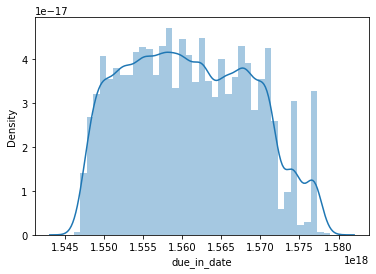

In [36]:
#NO left skew and right skew ,it is Normal Skewed
#Checking due_date frequency
sns.distplot(X_train['due_in_date'])

In [37]:
#Labelencoder Library
from sklearn.preprocessing import LabelEncoder

In [38]:
#Creating cust_number column as cust_number_encoder_en using Label encoder
cust_number_encoder = LabelEncoder()
X_train['cust_number_en'] = cust_number_encoder.fit_transform(X_train['cust_number'])
X_test['cust_number_en'] = cust_number_encoder.fit_transform(X_test['cust_number'])
X_val['cust_number_en'] = cust_number_encoder.fit_transform(X_val['cust_number'])

In [39]:
#Dropping cust_number col from all sets
X_train ,X_val, X_test = dropcolumns(['cust_number'])

<AxesSubplot:xlabel='cust_number_en', ylabel='delay'>

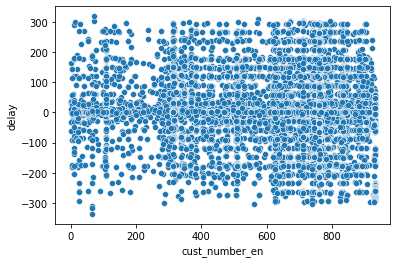

In [40]:
#Graph representing Each cust_number delay in payment
sns.scatterplot(data = X_train.merge(y_train,on = X_train.index), x='cust_number_en', y="delay")

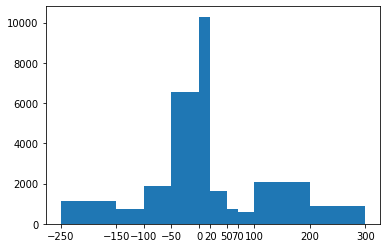

In [41]:
#Delay in payment for invoice 
bins = [-250,-150,-100,-50,0,20,50,70,100,200,300]
plt.hist(y_train,bins=bins)
plt.xticks(bins)
plt.show()

In [42]:
#Grouping same customer_number id
data = X_train.merge(y_train,on = X_train.index)
groupby = data.groupby('cust_number_en')

<AxesSubplot:xlabel='cust_number_en', ylabel='delay'>

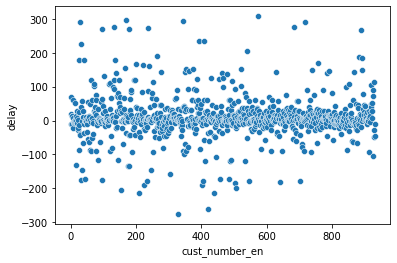

In [43]:
#Mean Delay by each customer during payment
sns.scatterplot(data=groupby.mean(), x="cust_number_en", y="delay")


# Feature Engineering Part - M2

In [44]:
#Checking datatypes
X_train.dtypes

business_code                   object
name_customer                   object
doc_id                           int64
posting_date            datetime64[ns]
document_create_date    datetime64[ns]
due_in_date             datetime64[ns]
invoice_currency                object
document type                   object
total_open_amount              float64
cust_payment_terms              object
invoice_id                       int32
cust_number_en                   int32
dtype: object

# Label encoding

In [45]:
#library
from sklearn.preprocessing import LabelEncoder

In [46]:
#Creating LabelEncoder for business_code column as business_code_label
bussiness_encoder = LabelEncoder()
X_train['business_code_en'] = bussiness_encoder.fit_transform(X_train['business_code'])
X_val['business_code_en'] = bussiness_encoder.transform(X_val['business_code'])
X_test['business_code_en'] = bussiness_encoder.transform(X_test['business_code'])

In [47]:
#drop business_code col from all sets
X_train ,X_val, X_test = dropcolumns(['business_code'])

In [48]:
#extract day,month and year 
X_train['day_of_due'] = X_train['due_in_date'].dt.day
X_train['month_of_due'] = X_train['due_in_date'].dt.month
X_train['year_of_due'] = X_train['due_in_date'].dt.year

X_val['day_of_due'] = X_val['due_in_date'].dt.day
X_val['month_of_due'] = X_val['due_in_date'].dt.month
X_val['year_of_due'] = X_val['due_in_date'].dt.year


X_test['day_of_due'] = X_test['due_in_date'].dt.day
X_test['month_of_due'] = X_test['due_in_date'].dt.month
X_test['year_of_due'] = X_test['due_in_date'].dt.year

In [49]:
#drop due_in_date col from all sets
X_train ,X_val, X_test = dropcolumns(['due_in_date'])

In [50]:
#Checking unique no of cust_payment_terms
X_train['cust_payment_terms'].nunique()

58

In [51]:
#Creating document type  column as document type_label
documenttype_encoder = LabelEncoder()
X_train['document type_en'] = documenttype_encoder.fit_transform(X_train['document type'])
X_val['document type_en'] = documenttype_encoder.transform(X_val['document type'])
X_test['document type_en'] = documenttype_encoder.transform(X_test['document type'])

In [52]:
#drop document type col from all sets
X_train ,X_val, X_test = dropcolumns(['document type'])

In [53]:
#Creating invoice_currency column as invoice_currency_label
invoice_currency_encoder = LabelEncoder()
X_train['invoice_currency_en'] = invoice_currency_encoder.fit_transform(X_train['invoice_currency'])
X_val['invoice_currency_en'] = invoice_currency_encoder.fit_transform(X_val['invoice_currency'])
X_test['invoice_currency_en'] = invoice_currency_encoder.fit_transform(X_test['invoice_currency'])

In [54]:
#drop invoice_currency col from all sets
X_train ,X_val, X_test = dropcolumns(['invoice_currency'])

In [55]:
#Creating cust_payment_terms column as cust_payment_terms_label
cust_payment_terms_encoder = LabelEncoder()
X_train['cust_payment_terms_en'] = cust_payment_terms_encoder.fit_transform(X_train['cust_payment_terms'])
X_val['cust_payment_terms_en'] = cust_payment_terms_encoder.fit_transform(X_val['cust_payment_terms'])
X_test['cust_payment_terms_en'] = cust_payment_terms_encoder.fit_transform(X_test['cust_payment_terms'])

In [56]:
#drop cust_payment_terms col from all sets
X_train ,X_val, X_test = dropcolumns(['cust_payment_terms'])

In [57]:
#checking
X_train.dtypes

name_customer                    object
doc_id                            int64
posting_date             datetime64[ns]
document_create_date     datetime64[ns]
total_open_amount               float64
invoice_id                        int32
cust_number_en                    int32
business_code_en                  int32
day_of_due                        int64
month_of_due                      int64
year_of_due                       int64
document type_en                  int32
invoice_currency_en               int32
cust_payment_terms_en             int32
dtype: object

In [58]:
#extract day,month and year 

X_train['day_of_posting_date'] = X_train['posting_date'].dt.day
X_train['month_of_posting_date'] = X_train['posting_date'].dt.month
X_train['year_of_posting_date'] = X_train['posting_date'].dt.year

X_val['day_of_posting_date'] = X_val['posting_date'].dt.day
X_val['month_of_posting_date'] = X_val['posting_date'].dt.month
X_val['year_of_posting_date'] = X_val['posting_date'].dt.year


X_test['day_of_posting_date'] = X_test['posting_date'].dt.day
X_test['month_of_posting_date'] = X_test['posting_date'].dt.month
X_test['year_of_posting_date'] = X_test['posting_date'].dt.year

In [59]:
#drop posting_date col from all sets
X_train ,X_val, X_test = dropcolumns(['posting_date'])

In [60]:
#extract day,month and year from document_create_date

X_train['day_of_document_create_date'] = X_train['document_create_date'].dt.day
X_train['month_of_document_create_date'] = X_train['document_create_date'].dt.month
X_train['year_of_document_create_date'] = X_train['document_create_date'].dt.year

X_val['day_of_document_create_date'] = X_val['document_create_date'].dt.day
X_val['month_of_document_create_date'] = X_val['document_create_date'].dt.month
X_val['year_of_document_create_date'] = X_val['document_create_date'].dt.year


X_test['day_of_document_create_date'] = X_test['document_create_date'].dt.day
X_test['month_of_document_create_date'] = X_test['document_create_date'].dt.month
X_test['year_of_document_create_date'] = X_test['document_create_date'].dt.year

In [61]:
#drop document_create_date col from all sets
X_train ,X_val, X_test = dropcolumns(['document_create_date'])

In [62]:
#Creating name_customer column as name_customer_en
name_customer_encoder = LabelEncoder()
X_train['name_customer_en'] = name_customer_encoder.fit_transform(X_train['name_customer'])
X_test['name_customer_en'] = name_customer_encoder.fit_transform(X_test['name_customer'])
X_val['name_customer_en'] = name_customer_encoder.fit_transform(X_val['name_customer'])


In [63]:
#drop name_customer col from all sets
X_train ,X_val, X_test = dropcolumns(['name_customer'])

In [64]:
#checking datatypes of train_set
X_train.dtypes

doc_id                             int64
total_open_amount                float64
invoice_id                         int32
cust_number_en                     int32
business_code_en                   int32
day_of_due                         int64
month_of_due                       int64
year_of_due                        int64
document type_en                   int32
invoice_currency_en                int32
cust_payment_terms_en              int32
day_of_posting_date                int64
month_of_posting_date              int64
year_of_posting_date               int64
day_of_document_create_date        int64
month_of_document_create_date      int64
year_of_document_create_date       int64
name_customer_en                   int32
dtype: object

## Variance threshold

In [65]:
#library for variance threshold
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(0.8)
sel.fit(X_train)

VarianceThreshold(threshold=0.8)

In [66]:
#Checking variances
sel.variances_

array([7.68306641e+16, 1.53578759e+09, 1.20321802e+18, 3.75695668e+04,
       2.99662446e-01, 7.08886240e+01, 8.73505409e+00, 6.71878535e-04,
       0.00000000e+00, 7.23811012e-02, 1.13113545e+02, 7.82007054e+01,
       7.01307839e+00, 5.08864185e-03, 8.39630969e+01, 9.02035607e+00,
       7.04320443e-03, 1.20925505e+06])

## Correlation graph

<AxesSubplot:title={'center':'Correlation of Features'}>

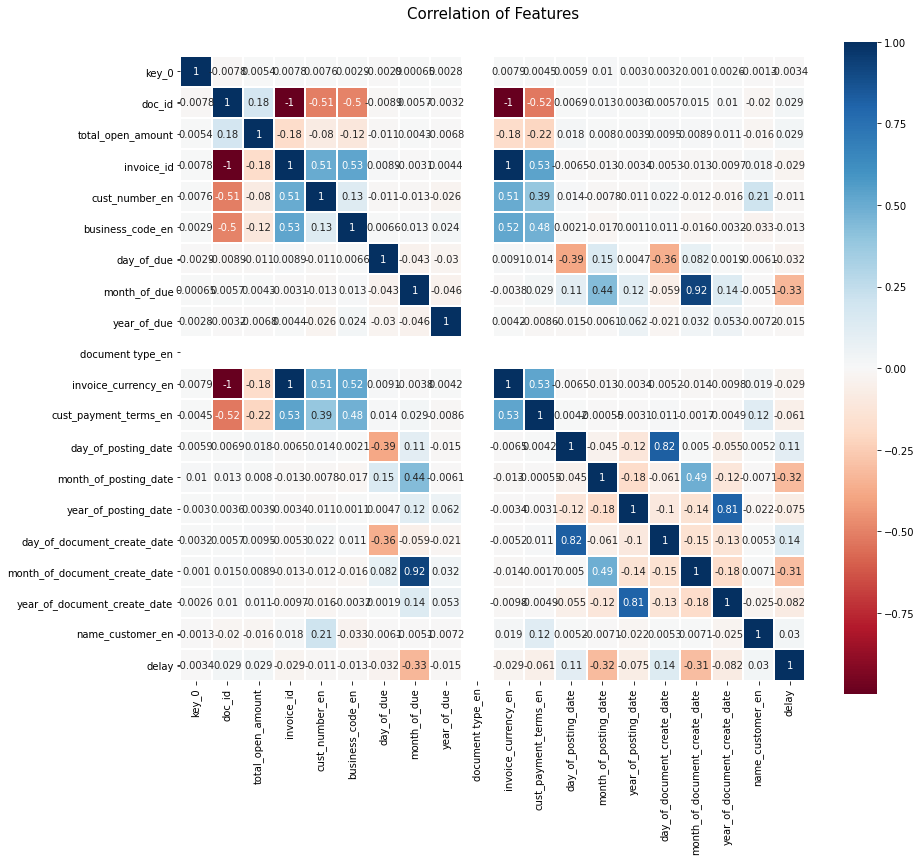

In [67]:
#Correlation graph
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Correlation of Features', y=1.05, size=15)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

# Model Creation - M3

## LinearRegression Model

In [68]:
#Library for Linear Regression
from sklearn.linear_model import LinearRegression
base_model = LinearRegression()


In [69]:
#fitting model on train_Set 
base_model.fit(X_train,y_train)

LinearRegression()

In [70]:
#y_predict containing the predicted data on validation set
y_predict = base_model.predict(X_val)


In [71]:
#Library for checking MSE(mean_squared_error)
from sklearn.metrics import mean_squared_error
#Checking MSE on predicted model with that of actual mode
mean_squared_error(y_val,y_predict, squared=False)

95.87825715014745

In [72]:
#Storing predicted and actual delay in met variable
met = pd.DataFrame(zip(y_predict , y_val),columns=['Predicted_delay','Actuals_delay'])

In [73]:
#Checking 
met

,Predicted_delay,Actuals_delay
0,-27.353926,6
1,-31.831732,1
2,-32.180983,1
3,-38.574164,-4
4,-33.681830,-1
...,...,...
5735,-66.873025,-1
5736,-66.855230,-4
5737,-61.090542,3
5738,-61.410068,0


In [74]:
#Predicting model on test_set of data
y_predict_test = base_model.predict(X_test)

In [75]:
#Storing it on met2 variable
met2 = pd.DataFrame(zip(y_predict_test , y_test),columns=['Predicted_delay','Actual_delay'])
met2

,Predicted_delay,Actual_delay
0,-65.977073,3
1,-62.900762,0
2,-64.362938,0
3,-86.308549,-279
4,-63.309917,3
...,...,...
5735,-190.463400,-1
5736,-175.246622,0
5737,-168.663346,3
5738,-210.910070,0


In [76]:
#Checking accuaracy
mean_squared_error(y_test, y_predict_test, squared=False)

163.7106972109476

# DecisionTreeRegressor Model

In [77]:
#Library for DecisionTreeRegressor Model
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0 , max_depth=5)

In [78]:
#fitting train_set on model
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=0)

In [79]:
#y_predict2 contains the predicted data from validation set
y_predict2 = regressor.predict(X_val)

In [80]:
#Checking accuracy
mean_squared_error(y_val, y_predict2, squared=False)

86.6396477528769

In [81]:
#y_predict_test containing the predicted data from test_set
y_predict_test = regressor.predict(X_test)
#checking accuaracy
mean_squared_error(y_test, y_predict_test, squared=False)

69.56611532031711

# Main_Test bringing in same format with that of X_train

### Data preprocessing on test data set for final prediction 

In [82]:
#Test_set containing all column except the target column
X_main_test = main_test.drop(['clear_date'],axis=1)
X_main_test

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
2,U001,200744019,TARG corp,2020,1930687944,25-03-2020,20200323,20200325,20200409,USD,RV,1,NaN,11537.62,20200325,NAA8,1.930688e+09,1
5,U001,200769623,WAL-MAR us,2020,1930832258,28-04-2020,20200428,20200428,20200513,USD,RV,1,NaN,1991.84,20200428,NAH4,1.930832e+09,1
14,U001,200416837,DEC associates,2020,1930857750,05-05-2020,20200505,20200505,20200524,USD,RV,1,NaN,106.20,20200501,NAM4,1.930858e+09,1
17,U001,200790710,F corporation,2020,1930638031,13-03-2020,20200311,20200313,20200328,USD,RV,1,NaN,41062.40,20200313,NAA8,1.930638e+09,1
33,U001,200769623,WAL-MAR corporation,2020,1930719464,01-04-2020,20200330,20200401,20200416,USD,RV,1,NaN,35878.19,20200401,NAH4,1.930719e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49962,U001,100031704,DELHAIZE foundation,2020,1930797460,19-04-2020,20200417,20200419,20200504,USD,RV,1,NaN,79418.60,20200419,NAA8,1.930797e+09,1
49967,U001,200727272,BROOKS corporation,2020,1930775177,11-04-2020,20200411,20200411,20200426,USD,RV,1,NaN,99977.39,20200411,NAA8,1.930775e+09,1
49974,U001,200803720,DEC foundation,2020,1930692430,24-03-2020,20200324,20200324,20200323,USD,RV,1,NaN,7717.20,20200316,NAM1,1.930692e+09,1
49975,U001,200772670,ASSOCIAT in,2020,1930700158,25-03-2020,20200325,20200325,20200409,USD,RV,1,NaN,130016.27,20200325,NAU5,1.930700e+09,1


In [83]:
#checking null columns
X_main_test.isna().sum()

business_code                 0
cust_number                   0
name_customer                 0
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             10000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    0
isOpen                        0
dtype: int64

In [84]:
#Droping null column
X_main_test = X_main_test.drop(['area_business'],axis=1)

In [85]:
#checking shape 
X_main_test.shape

(10000, 17)

In [86]:
#droping duplicates rows
X_main_test.drop_duplicates(keep=False,inplace=True)

In [87]:
#check datatype
X_main_test.dtypes

business_code              object
cust_number                object
name_customer              object
buisness_year               int64
doc_id                      int64
posting_date               object
document_create_date        int64
document_create_date.1      int64
due_in_date                 int64
invoice_currency           object
document type              object
posting_id                  int64
total_open_amount         float64
baseline_create_date        int64
cust_payment_terms         object
invoice_id                float64
isOpen                      int64
dtype: object

In [88]:
#Converting posting date datatype into datetime
X_main_test['posting_date'] = pd.to_datetime(X_main_test['posting_date'])
X_main_test.dtypes

business_code                     object
cust_number                       object
name_customer                     object
buisness_year                      int64
doc_id                             int64
posting_date              datetime64[ns]
document_create_date               int64
document_create_date.1             int64
due_in_date                        int64
invoice_currency                  object
document type                     object
posting_id                         int64
total_open_amount                float64
baseline_create_date               int64
cust_payment_terms                object
invoice_id                       float64
isOpen                             int64
dtype: object

In [89]:
#Converting document_create_date datatype into datetime
X_main_test['document_create_date'] = X_main_test['document_create_date'].astype(str)

In [90]:
#Converting document_create_date datatype into datetime
X_main_test['document_create_date'] = pd.to_datetime(X_main_test['document_create_date'])
X_main_test.dtypes

business_code                     object
cust_number                       object
name_customer                     object
buisness_year                      int64
doc_id                             int64
posting_date              datetime64[ns]
document_create_date      datetime64[ns]
document_create_date.1             int64
due_in_date                        int64
invoice_currency                  object
document type                     object
posting_id                         int64
total_open_amount                float64
baseline_create_date               int64
cust_payment_terms                object
invoice_id                       float64
isOpen                             int64
dtype: object

In [91]:
#Droping document_create_date.1 because this column does not contain useful info
X_main_test.drop('document_create_date.1',axis=1,inplace = True)
X_main_test

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
2,U001,200744019,TARG corp,2020,1930687944,2020-03-25,2020-03-23,20200409,USD,RV,1,11537.62,20200325,NAA8,1.930688e+09,1
5,U001,200769623,WAL-MAR us,2020,1930832258,2020-04-28,2020-04-28,20200513,USD,RV,1,1991.84,20200428,NAH4,1.930832e+09,1
14,U001,200416837,DEC associates,2020,1930857750,2020-05-05,2020-05-05,20200524,USD,RV,1,106.20,20200501,NAM4,1.930858e+09,1
17,U001,200790710,F corporation,2020,1930638031,2020-03-13,2020-03-11,20200328,USD,RV,1,41062.40,20200313,NAA8,1.930638e+09,1
33,U001,200769623,WAL-MAR corporation,2020,1930719464,2020-01-04,2020-03-30,20200416,USD,RV,1,35878.19,20200401,NAH4,1.930719e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49962,U001,100031704,DELHAIZE foundation,2020,1930797460,2020-04-19,2020-04-17,20200504,USD,RV,1,79418.60,20200419,NAA8,1.930797e+09,1
49967,U001,200727272,BROOKS corporation,2020,1930775177,2020-11-04,2020-04-11,20200426,USD,RV,1,99977.39,20200411,NAA8,1.930775e+09,1
49974,U001,200803720,DEC foundation,2020,1930692430,2020-03-24,2020-03-24,20200323,USD,RV,1,7717.20,20200316,NAM1,1.930692e+09,1
49975,U001,200772670,ASSOCIAT in,2020,1930700158,2020-03-25,2020-03-25,20200409,USD,RV,1,130016.27,20200325,NAU5,1.930700e+09,1


In [92]:
#Converting due_in_date datatype into datetime
X_main_test['due_in_date'] = X_main_test['due_in_date'].astype(str)
X_main_test.dtypes

business_code                   object
cust_number                     object
name_customer                   object
buisness_year                    int64
doc_id                           int64
posting_date            datetime64[ns]
document_create_date    datetime64[ns]
due_in_date                     object
invoice_currency                object
document type                   object
posting_id                       int64
total_open_amount              float64
baseline_create_date             int64
cust_payment_terms              object
invoice_id                     float64
isOpen                           int64
dtype: object

In [93]:
#Converting due_in_date datatype into datetime
X_main_test['due_in_date'] = pd.to_datetime(X_main_test['due_in_date'])
X_main_test.dtypes

business_code                   object
cust_number                     object
name_customer                   object
buisness_year                    int64
doc_id                           int64
posting_date            datetime64[ns]
document_create_date    datetime64[ns]
due_in_date             datetime64[ns]
invoice_currency                object
document type                   object
posting_id                       int64
total_open_amount              float64
baseline_create_date             int64
cust_payment_terms              object
invoice_id                     float64
isOpen                           int64
dtype: object

In [94]:
#Converting baseline_create_date datatype into datetime
X_main_test['baseline_create_date']=X_main_test['baseline_create_date'].astype(str)
X_main_test.dtypes

business_code                   object
cust_number                     object
name_customer                   object
buisness_year                    int64
doc_id                           int64
posting_date            datetime64[ns]
document_create_date    datetime64[ns]
due_in_date             datetime64[ns]
invoice_currency                object
document type                   object
posting_id                       int64
total_open_amount              float64
baseline_create_date            object
cust_payment_terms              object
invoice_id                     float64
isOpen                           int64
dtype: object

In [95]:
#Converting baseline_create_date datatype into datetime
X_main_test['baseline_create_date'] = pd.to_datetime(X_main_test['baseline_create_date'])
X_main_test.dtypes

business_code                   object
cust_number                     object
name_customer                   object
buisness_year                    int64
doc_id                           int64
posting_date            datetime64[ns]
document_create_date    datetime64[ns]
due_in_date             datetime64[ns]
invoice_currency                object
document type                   object
posting_id                       int64
total_open_amount              float64
baseline_create_date    datetime64[ns]
cust_payment_terms              object
invoice_id                     float64
isOpen                           int64
dtype: object

In [96]:
#check whether invoice_id has null value
print(X_main_test['invoice_id'].isnull().sum())

0


In [97]:
#Converting datatype to int
X_main_test['invoice_id'] = X_main_test['invoice_id'].astype(int)
X_main_test['invoice_id'].dtype

dtype('int32')

In [98]:
#Creating cust_number_encoder column as cust_number_encoder_en
cust_number_encoder = LabelEncoder()
X_main_test['cust_number_en'] = cust_number_encoder.fit_transform(X_main_test['cust_number'])

In [99]:
#droping cust_number col
X_main_test = X_main_test.drop(['cust_number'],axis=1)

In [100]:
#count frequency of data in posting_id and droping posting id
X_main_test['posting_id'].value_counts()


1    9337
Name: posting_id, dtype: int64

In [101]:
#Droping posting_id not useful
X_main_test['posting_id'] = X_main_test['posting_id'].replace(1,np.nan)
X_main_test.dropna(how='all', axis=1, inplace=True)

In [102]:
#Drop inOpen column
X_main_test['isOpen'] = X_main_test['isOpen'].replace(1,np.nan)
X_main_test.dropna(how='all', axis=1, inplace=True)


In [103]:
#sorted dataframe using posting_date in ascending order of Dates 
X_main_test = X_main_test.sort_values(by = 'posting_date')
X_main_test.dtypes

business_code                   object
name_customer                   object
buisness_year                    int64
doc_id                           int64
posting_date            datetime64[ns]
document_create_date    datetime64[ns]
due_in_date             datetime64[ns]
invoice_currency                object
document type                   object
total_open_amount              float64
baseline_create_date    datetime64[ns]
cust_payment_terms              object
invoice_id                       int32
cust_number_en                   int32
dtype: object

In [104]:
#Creating LabelEncoder for business_code column as business_code_label
bussiness_encoder = LabelEncoder()
X_main_test['business_code_en'] = bussiness_encoder.fit_transform(X_main_test['business_code'])

In [105]:
#drop business_code col
X_main_test.drop(['business_code'], axis =1,inplace=True)

In [106]:
#extract day,month and year 

X_main_test['day_of_due'] = X_main_test['due_in_date'].dt.day
X_main_test['month_of_due'] = X_main_test['due_in_date'].dt.month
X_main_test['year_of_due'] = X_main_test['due_in_date'].dt.year


In [107]:
#drop due_in_date col
X_main_test = X_main_test.drop(['due_in_date'],axis=1)

In [108]:
#Creating document type  column as document type_label
documenttype_encoder = LabelEncoder()
X_main_test['document type_en'] = documenttype_encoder.fit_transform(X_main_test['document type'])


In [109]:
#droping document type col
X_main_test = X_main_test.drop(['document type'],axis=1)

In [110]:
#Creating invoice_currency column as invoice_currency_label
invoice_currency_encoder = LabelEncoder()
X_main_test['invoice_currency_en'] = invoice_currency_encoder.fit_transform(X_main_test['invoice_currency'])

In [111]:
#droping invoice_currency column
X_main_test = X_main_test.drop(['invoice_currency'],axis=1)

In [112]:
#Creating cust_payment_terms column as cust_payment_terms_label
cust_payment_terms_encoder = LabelEncoder()
X_main_test['cust_payment_terms_en'] = cust_payment_terms_encoder.fit_transform(X_main_test['cust_payment_terms'])

In [113]:
#droping cust_payment_terms col
X_main_test = X_main_test.drop(['cust_payment_terms'],axis=1)

In [114]:
#extract day,month and year 

X_main_test['day_of_posting_date'] = X_main_test['posting_date'].dt.day
X_main_test['month_of_posting_date'] = X_main_test['posting_date'].dt.month
X_main_test['year_of_posting_date'] = X_main_test['posting_date'].dt.year

In [115]:
#droping posting_date col
X_main_test = X_main_test.drop(['posting_date'],axis=1)

In [116]:
#extract day,month and year 

X_main_test['day_of_document_create_date'] = X_main_test['document_create_date'].dt.day
X_main_test['month_of_document_create_date'] = X_main_test['document_create_date'].dt.month
X_main_test['year_of_document_create_date'] = X_main_test['document_create_date'].dt.year

In [117]:
#droping document_create_date col
X_main_test = X_main_test.drop(['document_create_date'],axis=1)

In [118]:
#checking
X_main_test.dtypes

name_customer                            object
buisness_year                             int64
doc_id                                    int64
total_open_amount                       float64
baseline_create_date             datetime64[ns]
invoice_id                                int32
cust_number_en                            int32
business_code_en                          int32
day_of_due                                int64
month_of_due                              int64
year_of_due                               int64
document type_en                          int32
invoice_currency_en                       int32
cust_payment_terms_en                     int32
day_of_posting_date                       int64
month_of_posting_date                     int64
year_of_posting_date                      int64
day_of_document_create_date               int64
month_of_document_create_date             int64
year_of_document_create_date              int64
dtype: object

In [119]:
#droping buisness_year col
X_main_test = X_main_test.drop(['buisness_year'],axis=1)

In [120]:
#droping baseline_create_date col
X_main_test = X_main_test.drop(['baseline_create_date'],axis=1)

In [121]:
#Creating name_customer column as name_customer_en
name_customer_encoder = LabelEncoder()
X_main_test['name_customer_en'] = name_customer_encoder.fit_transform(X_main_test['name_customer'])

In [122]:
#droping name_customer col
X_main_test = X_main_test.drop(['name_customer'],axis=1)

# Final Prediction on Test_data_set

In [123]:
# PREDICT IT on test_set
final_result = regressor.predict(X_main_test)

In [124]:
#final_result containing the Predicted_delay data
final_result = pd.DataFrame(final_result,columns=['Predicted_delay'])

In [125]:
#check
final_result

,Predicted_delay
0,24.870709
1,24.870709
2,24.870709
3,-2.819712
4,24.870709
...,...
9332,0.590169
9333,-103.500000
9334,0.590169
9335,0.590169


In [126]:
#Merging final_result predicted data to Final Dataframe
Final = X_main_test.merge(final_result , on = X_main_test.index )

In [127]:
#check
Final.dtypes

key_0                              int64
doc_id                             int64
total_open_amount                float64
invoice_id                         int32
cust_number_en                     int32
business_code_en                   int32
day_of_due                         int64
month_of_due                       int64
year_of_due                        int64
document type_en                   int32
invoice_currency_en                int32
cust_payment_terms_en              int32
day_of_posting_date                int64
month_of_posting_date              int64
year_of_posting_date               int64
day_of_document_create_date        int64
month_of_document_create_date      int64
year_of_document_create_date       int64
name_customer_en                   int32
Predicted_delay                  float64
dtype: object

In [128]:
#Creating due_date containing due_date values
Final['due_date'] = Final['year_of_posting_date'].astype(str)+Final['day_of_due'].astype(str)+Final['month_of_due'].astype(str)


In [129]:
#Converting due_date datatype to datetime
Final['due_date'] = pd.to_datetime(Final['due_date'],format="%Y%d%m")

In [130]:
#Converting Predicted_delay datatype to timedelta type - days
Final['Predicted_delay'] = pd.to_numeric(Final['Predicted_delay']).astype(int)

In [131]:
#Converting Predicted_delay datatype to timedelta type - days
Final['Predicted_delay']=  pd.to_timedelta(Final['Predicted_delay'], unit='D')

In [132]:
#Final predicted_payment_date for clearing dues payments
Final['predicted_payment_date'] = Final['due_date'] + Final['Predicted_delay']

In [133]:
#Predicted_delay converted into int data type
Final['Predicted_delay'] = Final['Predicted_delay'].dt.days.astype('int16')

In [134]:
#checking Final dataframe datatypes
Final.dtypes

key_0                                     int64
doc_id                                    int64
total_open_amount                       float64
invoice_id                                int32
cust_number_en                            int32
business_code_en                          int32
day_of_due                                int64
month_of_due                              int64
year_of_due                               int64
document type_en                          int32
invoice_currency_en                       int32
cust_payment_terms_en                     int32
day_of_posting_date                       int64
month_of_posting_date                     int64
year_of_posting_date                      int64
day_of_document_create_date               int64
month_of_document_create_date             int64
year_of_document_create_date              int64
name_customer_en                          int32
Predicted_delay                           int16
due_date                         datetim

In [135]:
#Predicted_delay_Ageing_buckets
bins = [-130,-10,0,10,30,50,70,100]
labe = ['<100','<0','0-15','16-30','31-50','51-70','>100']
Final['Predicted_delay_Ageing_buckets'] = pd.cut(Final['Predicted_delay'],bins,labels = labe)

In [136]:
#Final dataframe with predicted clear_date and predicted delay
Final

,key_0,doc_id,total_open_amount,invoice_id,cust_number_en,business_code_en,day_of_due,month_of_due,year_of_due,document type_en,...,month_of_posting_date,year_of_posting_date,day_of_document_create_date,month_of_document_create_date,year_of_document_create_date,name_customer_en,Predicted_delay,due_date,predicted_payment_date,Predicted_delay_Ageing_buckets
0,38626,1930583194,9530.46,1930583194,380,1,16,3,2020,0,...,1,2020,29,2,2020,255,24,2020-03-16,2020-04-09,16-30
1,45433,1930583917,124851.20,1930583917,293,1,16,3,2020,0,...,1,2020,29,2,2020,546,24,2020-03-16,2020-04-09,16-30
2,39150,1930583990,5967.84,1930583990,390,1,16,3,2020,0,...,1,2020,29,2,2020,1647,24,2020-03-16,2020-04-09,16-30
3,23057,1930570987,52611.54,1930570987,497,1,1,3,2020,0,...,1,2020,2,3,2020,805,-2,2020-03-01,2020-02-28,<0
4,35622,1930582848,59695.79,1930582848,390,1,16,3,2020,0,...,1,2020,29,2,2020,1647,24,2020-03-16,2020-04-09,16-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9332,30292,1930892283,18285.63,1930892283,390,1,27,5,2020,0,...,12,2020,12,5,2020,1650,0,2020-05-27,2020-05-27,<0
9333,19957,2960634608,24538.14,-2147483648,135,0,30,5,2020,0,...,12,2020,12,5,2020,332,-103,2020-05-30,2020-02-17,<100
9334,29321,1930887050,4956.82,1930887050,390,1,27,5,2020,0,...,12,2020,11,5,2020,1644,0,2020-05-27,2020-05-27,<0
9335,14953,1930886423,8617.94,1930886423,390,1,27,5,2020,0,...,12,2020,11,5,2020,1643,0,2020-05-27,2020-05-27,<0


In [137]:
Final.to_csv('Desktop/csvtodb.csv')